Introduction :
    
The dataset likely represents information related to the Titanic, possibly containing details about passengers such as their age, gender, class, fare paid, survival status, and other related attributes. This kind of dataset is commonly used for predictive analysis and machine learning tasks, such as survival prediction based on different passenger characteristics. The structured format of the data allows for easy organization and analysis, helping to identify patterns and relationships between passenger attributes and survival rates.
    
    


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math

td=pd.read_csv("train.csv")

In [2]:
td.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
td.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:

a = td[td["Survived"] == 1]
a1 = a[a["Pclass"] == 1]
print(a1['Age'].median()) 

b = td[td["Survived"] == 0]
b1 = b[b["Pclass"] == 1]
print(b1['Age'].median())

c = td[td["Survived"] == 1]
c1 = c[c["Pclass"] == 2]
print(c1['Age'].median())

d = td[td["Survived"] == 0]
d1 = d[d["Pclass"] == 2]
print(d1['Age'].median())

e = td[td["Survived"] == 1]
e1 = e[e["Pclass"] == 3]
print(e1['Age'].median())

f = td[td["Survived"] == 0]
f1 = f[f["Pclass"] == 3]
print(f1['Age'].median())


a = td[td["Survived"] == 1]
a1 = a[a["Pclass"] == 1]
print(a1['Embarked'].mode()[0])  

b = td[td["Survived"] == 0]
b1 = b[b["Pclass"] == 1]
print(b1['Embarked'].mode()[0])

c = td[td["Survived"] == 1]
c1 = c[c["Pclass"] == 2]
print(c1['Embarked'].mode()[0])

d = td[td["Survived"] == 0]
d1 = d[d["Pclass"] == 2]
print(d1['Embarked'].mode()[0])

e = td[td["Survived"] == 1]
e1 = e[e["Pclass"] == 3]
print(e1['Embarked'].mode()[0])

f = td[td["Survived"] == 0]
f1 = f[f["Pclass"] == 3]
print(f1['Embarked'].mode()[0])


35.0
45.25
28.0
30.5
22.0
25.0
S
S
S
S
S
S


In [6]:
td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(35.0)
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(28.0)
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(22.0)

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(45.25)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(30.5)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(25.0)

td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("B96")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E101")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E121")

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("C124")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("D")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("F")
td.Embarked.fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [7]:
# td['FamilySize'] = td['SibSp'] + td['Parch'] + 1

# 1.Total No.of Passangers:891

# 2.columns/ filds:12

<Axes: xlabel='Survived', ylabel='count'>

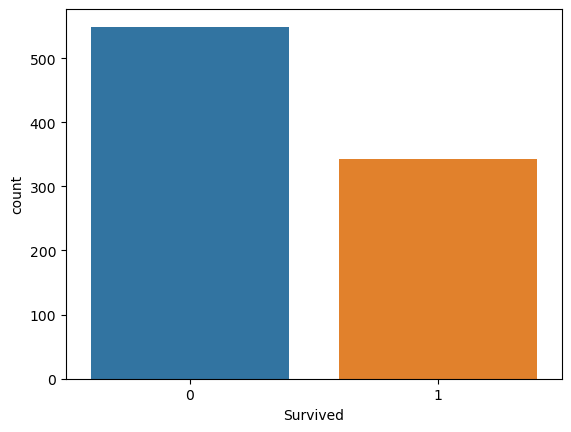

In [8]:
sb.countplot(x="Survived",data=td)

<Axes: xlabel='Pclass', ylabel='count'>

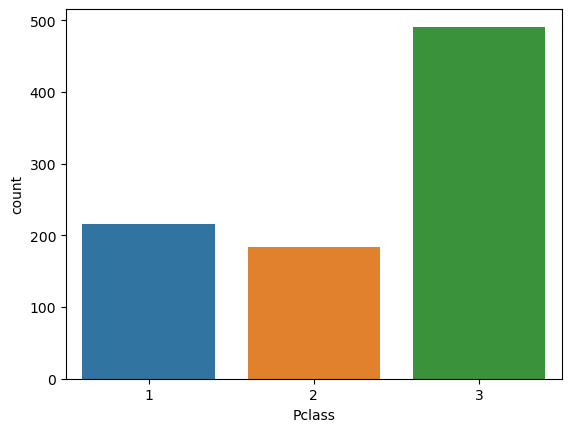

In [9]:
sb.countplot(x="Pclass", data=td)

<Axes: xlabel='Pclass', ylabel='count'>

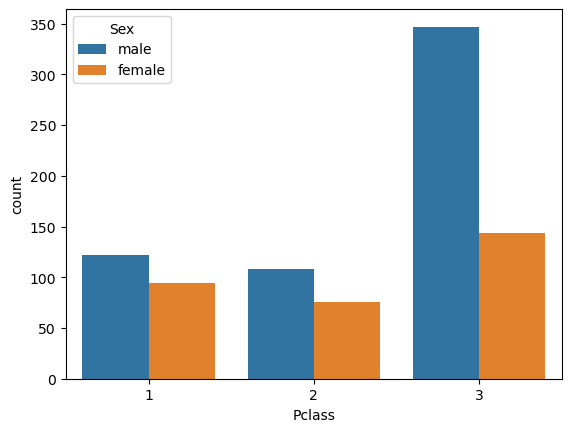

In [10]:
sb.countplot(x="Pclass", hue="Sex",data=td)

<Axes: xlabel='Survived', ylabel='count'>

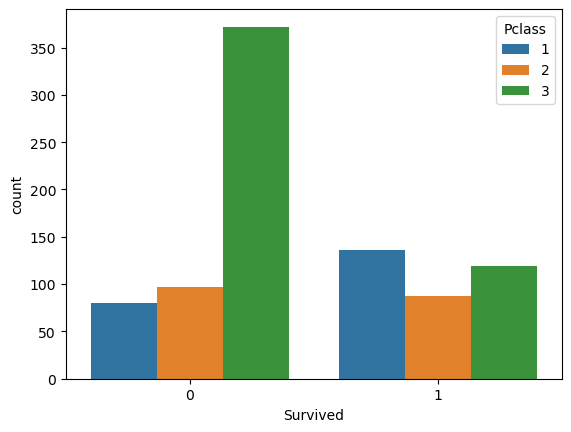

In [11]:
sb.countplot(x="Survived", hue="Pclass",data=td)

<Axes: xlabel='Survived', ylabel='count'>

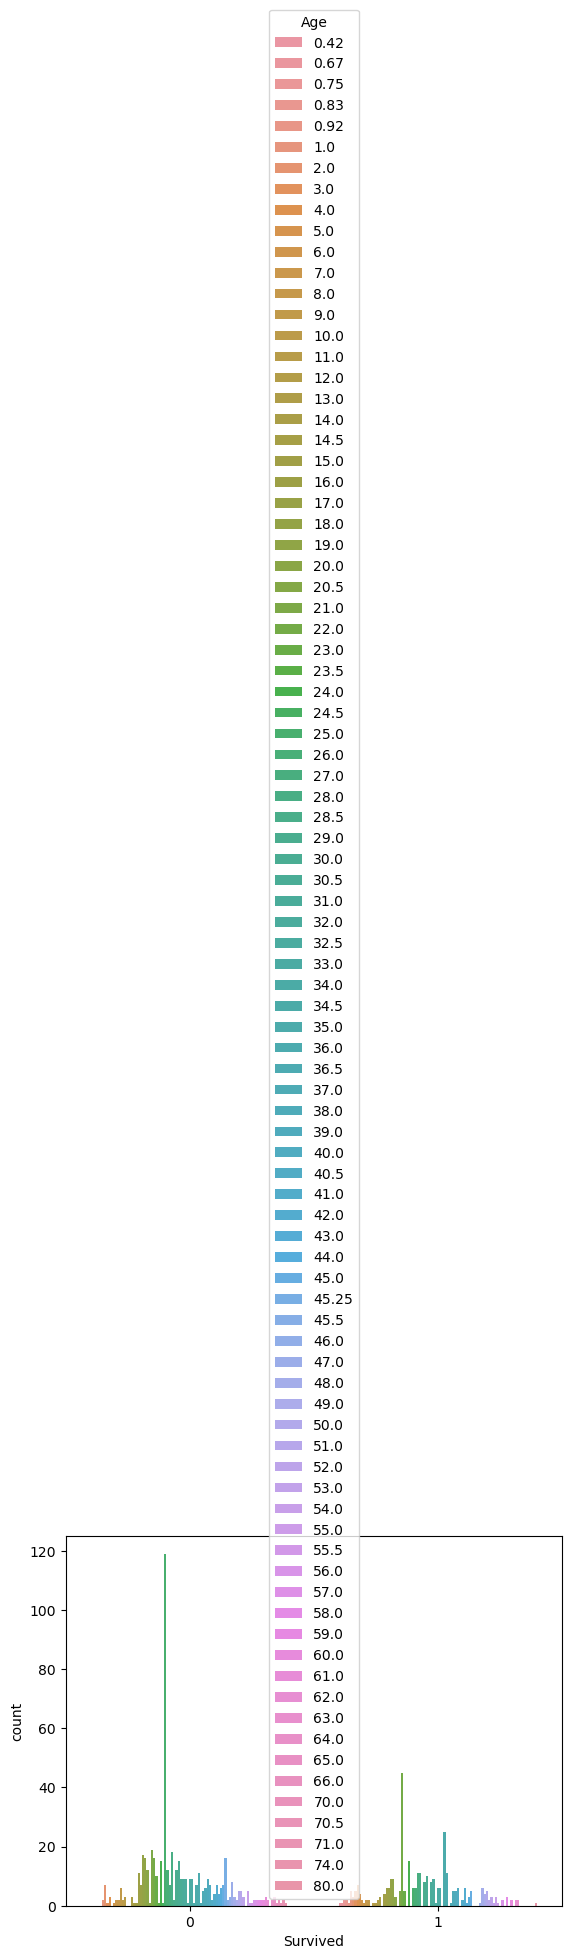

In [12]:
sb.countplot(x="Survived", hue="Age",data=td)

The count plot of Survived vs Age provides insights into the survival distribution across different age groups. The plot uses the hue="Age" parameter to distinguish between different age categories, allowing for a comparison of survival rates among these groups. If the plot shows noticeable differences in bar heights for each age group, it suggests that age had a significant influence on survival chances.

In [13]:
td.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [15]:
td.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
td.dropna(inplace=True)

In [17]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
td.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  889 non-null    bool 
 1   Survived     889 non-null    bool 
 2   Pclass       889 non-null    bool 
 3   Name         889 non-null    bool 
 4   Sex          889 non-null    bool 
 5   Age          889 non-null    bool 
 6   SibSp        889 non-null    bool 
 7   Parch        889 non-null    bool 
 8   Ticket       889 non-null    bool 
 9   Fare         889 non-null    bool 
 10  Cabin        889 non-null    bool 
 11  Embarked     889 non-null    bool 
dtypes: bool(12)
memory usage: 17.4 KB


In [19]:
print(td['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object


In [20]:
sex=pd.get_dummies(td['Sex'])

In [21]:
print(sex)

     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[889 rows x 2 columns]


In [22]:
print(td['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object


In [23]:
emb=pd.get_dummies(td['Embarked'])

In [24]:
print(emb)

     C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[889 rows x 3 columns]


In [25]:
print(td['Pclass'])

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64


In [26]:
pcls=pd.get_dummies(td['Pclass'],prefix="Pclass")

In [27]:
print(pcls)

     Pclass_1  Pclass_2  Pclass_3
0           0         0         1
1           1         0         0
2           0         0         1
3           1         0         0
4           0         0         1
..        ...       ...       ...
886         0         1         0
887         1         0         0
888         0         0         1
889         1         0         0
890         0         0         1

[889 rows x 3 columns]


In [28]:
print(td.Cabin)

0         F
1       C85
2      E121
3      C123
4         F
       ... 
886       D
887     B42
888       F
889    C148
890       F
Name: Cabin, Length: 889, dtype: object


In [29]:
cab=pd.get_dummies(td['Cabin'],prefix="Cabin")
print(cab)

     Cabin_A10  Cabin_A14  Cabin_A16  Cabin_A19  Cabin_A20  Cabin_A23  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          0   
4            0          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
886          0          0          0          0          0          0   
887          0          0          0          0          0          0   
888          0          0          0          0          0          0   
889          0          0          0          0          0          0   
890          0          0          0          0          0          0   

     Cabin_A24  Cabin_A26  Cabin_A31  Cabin_A32  ...  Cabin_F  Cabin_F E69  \
0            0          0          0         

In [30]:
td.drop(["Pclass","Sex","Embarked"],axis=1,inplace=True)

In [31]:
td=pd.concat([td,sex,emb,pcls,cab],axis=1)

In [32]:
print(td.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Columns: 165 entries, PassengerId to Cabin_T
dtypes: float64(2), int64(4), object(3), uint8(156)
memory usage: 204.9+ KB
None


In [33]:
td.drop(["Name","PassengerId","Ticket","Cabin"],axis=1,inplace=True)

In [34]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Columns: 161 entries, Survived to Cabin_T
dtypes: float64(2), int64(3), uint8(156)
memory usage: 177.1 KB


In [35]:
td.head(5)

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,Cabin_F,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,22.0,1,0,7.2500,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [36]:
X=td.drop(["Survived"],axis=1)

In [37]:
print(X)

      Age  SibSp  Parch     Fare  female  male  C  Q  S  Pclass_1  ...  \
0    22.0      1      0   7.2500       0     1  0  0  1         0  ...   
1    38.0      1      0  71.2833       1     0  1  0  0         1  ...   
2    26.0      0      0   7.9250       1     0  0  0  1         0  ...   
3    35.0      1      0  53.1000       1     0  0  0  1         1  ...   
4    35.0      0      0   8.0500       0     1  0  0  1         0  ...   
..    ...    ...    ...      ...     ...   ... .. .. ..       ...  ...   
886  27.0      0      0  13.0000       0     1  0  0  1         0  ...   
887  19.0      0      0  30.0000       1     0  0  0  1         1  ...   
888  25.0      1      2  23.4500       1     0  0  0  1         0  ...   
889  26.0      0      0  30.0000       0     1  1  0  0         1  ...   
890  32.0      0      0   7.7500       0     1  0  1  0         0  ...   

     Cabin_F  Cabin_F E69  Cabin_F G63  Cabin_F G73  Cabin_F2  Cabin_F33  \
0          1            0          

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Columns: 160 entries, Age to Cabin_T
dtypes: float64(2), int64(2), uint8(156)
memory usage: 170.2 KB


In [39]:
y=td["Survived"]

In [40]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 747 to 37
Columns: 160 entries, Age to Cabin_T
dtypes: float64(2), int64(2), uint8(156)
memory usage: 127.5 KB


In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 387 to 292
Columns: 160 entries, Age to Cabin_T
dtypes: float64(2), int64(2), uint8(156)
memory usage: 42.7 KB


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lm=LogisticRegression(max_iter=10000)

In [47]:
print(lm.fit(X_train,y_train))

LogisticRegression(max_iter=10000)


In [48]:
Predections=lm.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,Predections))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       138
           1       0.97      0.98      0.97        85

    accuracy                           0.98       223
   macro avg       0.98      0.98      0.98       223
weighted avg       0.98      0.98      0.98       223



In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
print(confusion_matrix(y_test,Predections))

[[135   3]
 [  2  83]]


In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print(accuracy_score(y_test,Predections))

0.9775784753363229


In [55]:
#import pickle

In [56]:
# save the model to disk
#with open('Titanic','wb') as f:
#   pickle.dump(td,f)


In [57]:
Predections

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [58]:
td["Age-D"]=td["Age"]

In [59]:
td.corr()

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Age-D
Survived,1.000000,-0.078590,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777,...,0.042642,-0.026409,-0.037369,0.034030,0.073942,-0.026409,0.060339,0.016261,-0.026409,-0.078590
Age,-0.078590,1.000000,-0.243228,-0.172950,0.121731,-0.101366,0.101366,0.043610,-0.088744,0.017654,...,-0.018098,0.032301,-0.025609,-0.067067,-0.000795,-0.010538,-0.095141,-0.072859,0.039861,1.000000
SibSp,-0.034040,-0.243228,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438,...,0.014475,-0.015947,-0.022565,0.007516,-0.027652,-0.015947,0.063530,-0.001474,-0.015947,-0.243228
Parch,0.083151,-0.172950,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512,...,0.025702,-0.015917,-0.022523,0.068623,-0.027601,-0.015917,0.036368,0.072335,-0.015917,-0.172950
Fare,0.255290,0.121731,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758,...,-0.006579,-0.016517,-0.023371,-0.007142,-0.024325,-0.016449,0.006600,-0.025061,0.002299,0.121731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cabin_F38,-0.026409,-0.010538,-0.015947,-0.015917,-0.016449,-0.024676,0.024676,-0.016199,0.108975,-0.054407,...,-0.001126,-0.001126,-0.001593,-0.001953,-0.001953,1.000000,-0.001593,-0.002256,-0.001126,-0.010538
Cabin_F4,0.060339,-0.095141,0.063530,0.036368,0.006600,0.014829,-0.014829,-0.022921,-0.014622,0.029288,...,-0.001593,-0.001593,-0.002255,-0.002763,-0.002763,-0.001593,1.000000,-0.003192,-0.001593,-0.095141
Cabin_G6,0.016261,-0.072859,-0.001474,0.072335,-0.025061,0.091426,-0.091426,-0.032452,-0.020703,0.041467,...,-0.002256,-0.002256,-0.003192,-0.003912,-0.003912,-0.002256,-0.003192,1.000000,-0.002256,-0.072859
Cabin_T,-0.026409,0.039861,-0.015947,-0.015917,0.002299,-0.024676,0.024676,-0.016199,-0.010334,0.020698,...,-0.001126,-0.001126,-0.001593,-0.001953,-0.001953,-0.001126,-0.001593,-0.002256,1.000000,0.039861


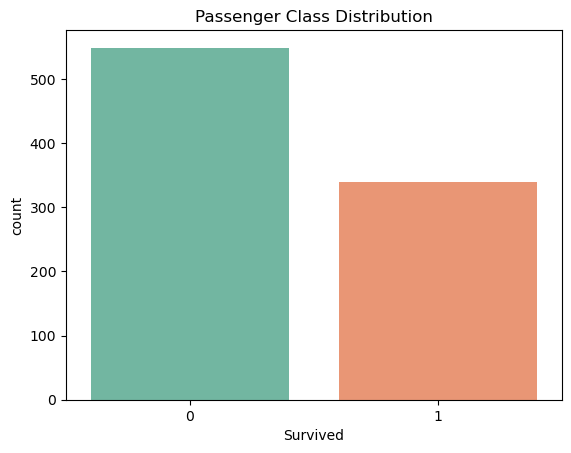

In [60]:
import seaborn as sb
sb.countplot(x='Survived', data=td, palette='Set2')
plt.title('Passenger Class Distribution')
plt.show()


The bar plot shows that most passengers belonged to the 3rd class (Pclass = 3). The number of passengers in the 1st class and 2nd class is significantly lower compared to the 3rd class. This reflects the socio-economic status of passengers on the Titanic, where the majority were from the working class.



In [61]:
print(td.columns)

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q',
       'S',
       ...
       'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33',
       'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Age-D'],
      dtype='object', length=162)


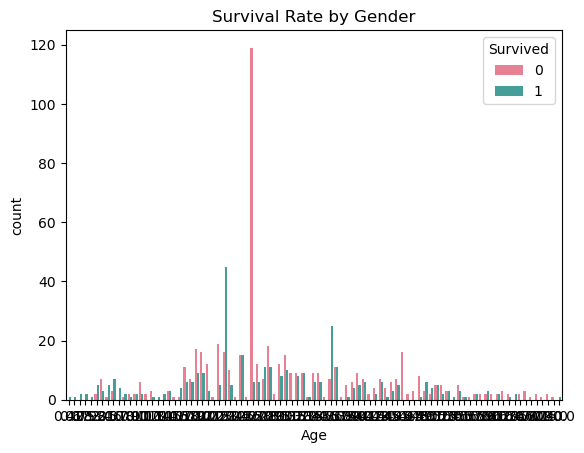

In [62]:

sb.countplot(x='Age', hue='Survived', data=td, palette='husl')
plt.title('Survival Rate by Gender')
plt.show()


The count plot of Age vs Survived with the hue='Survived' parameter shows the survival distribution across different age groups. The plot reveals how survival rates varied with age, providing insights into which age groups had higher or lower chances of survival. If younger age groups have taller bars in the "Survived" category, it suggests that younger individuals had a better chance of survival, possibly due to prioritization during rescue efforts. On the other hand, lower survival rates among older age groups might reflect vulnerabilities or other influencing factors such as physical limitations or social dynamics.

C:\Users\varik\AppData\Local\Temp\ipykernel_15216\2392111862.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(td.loc[td['Survived'] == 1, 'Age'], label='Survived', shade=True)
C:\Users\varik\AppData\Local\Temp\ipykernel_15216\2392111862.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(td.loc[td['Survived'] == 0, 'Age'], label='Did Not Survive', shade=True)


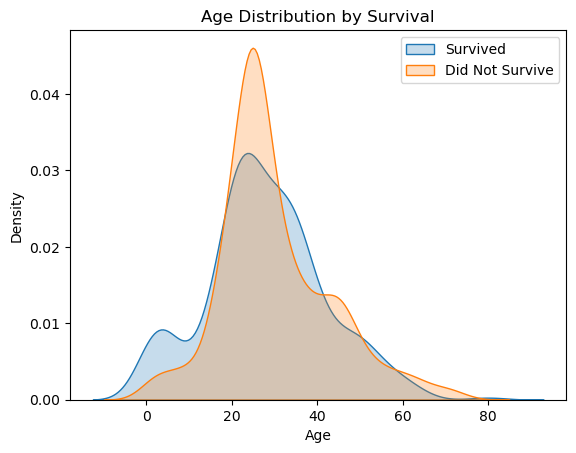

In [63]:
sb.kdeplot(td.loc[td['Survived'] == 1, 'Age'], label='Survived', shade=True)
sb.kdeplot(td.loc[td['Survived'] == 0, 'Age'], label='Did Not Survive', shade=True)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()


The KDE plot comparing the age distribution of individuals who survived and those who did not survive reveals some interesting insights. The distribution for individuals who survived is slightly skewed towards younger ages, with a peak around 20-30 years, indicating that a higher proportion of survivors were younger. In contrast, the distribution for individuals who did not survive is more spread out, with a broader range of ages, but it also seems to have a higher concentration in older age groups. This suggests that older individuals were more likely to have not survived. Overall, the survival rate appears to be higher among younger individuals, while older individuals faced a higher mortality rate, which might be consistent with trends observed in certain real-world datasets like the Titanic dataset.

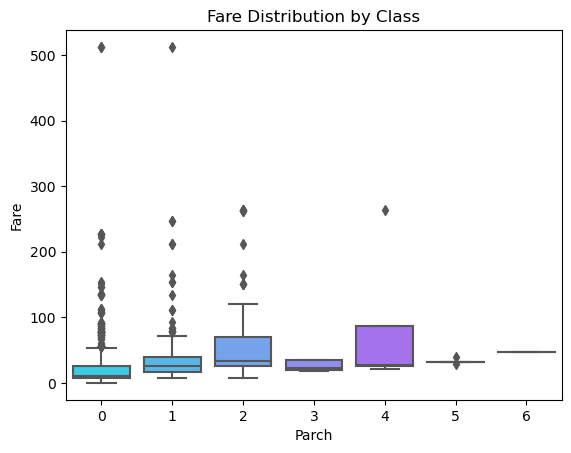

In [64]:
sb.boxplot(x='Parch', y='Fare', data=td, palette='cool')
plt.title('Fare Distribution by Class')
plt.show()


Variation in Fare Across Parch Levels: The plot will show how the fare varies depending on the number of parents/children aboard. We might observe that passengers with more family members (i.e., higher Parch values) tend to pay higher fares, likely due to being in higher-class cabins or purchasing multiple tickets for family members.

Outliers: Outliers in the fare distribution may appear, particularly for those with lower or higher values of Parch, indicating that some passengers paid significantly more or less than others.

Median Fare: The median fare for each Parch category may give insight into the typical fare paid by individuals based on their family size. For example, passengers with no parents/children (Parch = 0) may have a different fare distribution compared to those traveling with family.

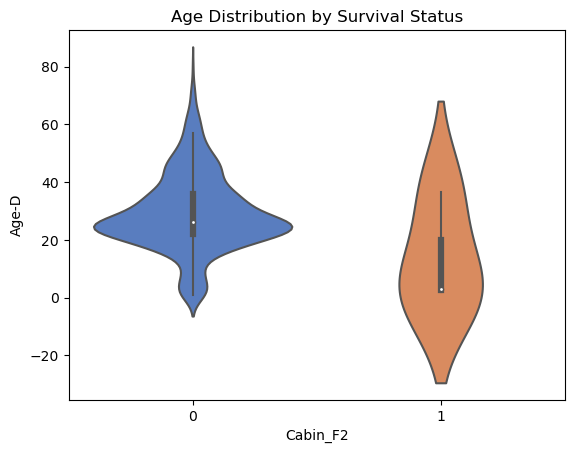

In [65]:
sb.violinplot(x='Cabin_F2', y='Age-D', data=td, palette='muted')
plt.title('Age Distribution by Survival Status')
plt.show()


Shape of Distribution: The violin plot shows the distribution of Age-D for each category of Cabin_F2. If there’s a significant difference in the shape of the distribution between different cabin categories, it may indicate a trend related to age and the cabin class.

Median Age: The thick line in the center of each violin represents the median age for passengers within each Cabin_F2 category. You can observe if certain categories have younger or older passengers.

Range and Spread: The width of the violin indicates the density of passengers within different age ranges. A wider section indicates a higher concentration of passengers in that age range. Narrower sections show fewer passengers in those ranges.

Survival Trends: If the plot is split by survival status (depending on how Cabin_F2 is categorized), it can show if certain age groups were more likely to survive or if there was any age-related trend in survival within specific cabins or categories.

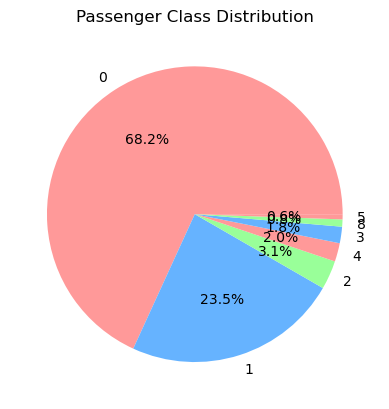

In [66]:
td['SibSp'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff', '#99ff99'])
plt.title('Passenger Class Distribution')
plt.ylabel('')
plt.show()


td['SibSp'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff', '#99ff99'])
plt.title('Passenger Class Distribution')
plt.ylabel('')
plt.show()


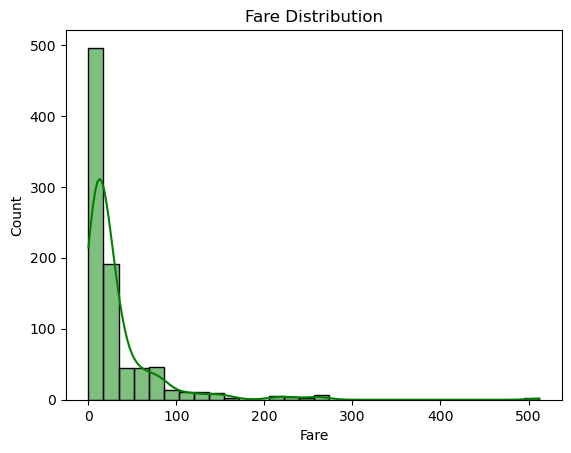

In [67]:
sb.histplot(td['Fare'], bins=30, kde=True, color='green')
plt.title('Fare Distribution')
plt.show()


C:\Users\varik\AppData\Local\Temp\ipykernel_15216\1958294103.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sb.swarmplot(x='female', y='male', data=td, palette='cool', size=3)
C:\Users\varik\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varik\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varik\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


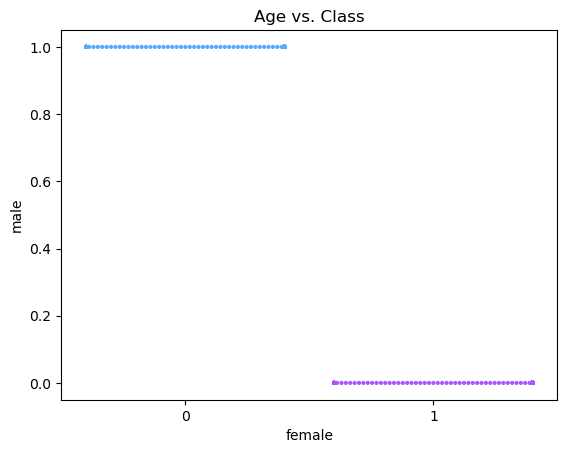

In [68]:
sb.swarmplot(x='female', y='male', data=td, palette='cool', size=3)
plt.title('Age vs. Class')
plt.show()


t seems like the code you've provided contains an issue. The swarmplot is intended to plot the distribution of one variable against another. However, x='female' and y='male' are not typically numerical variables, which may lead to an incorrect plot. If female and male are binary indicators (e.g., 0 or 1), then this may work, but it's important to ensure that the variables plotted on both axes are suitable for a scatter-like plot, which is what swarmplot does.

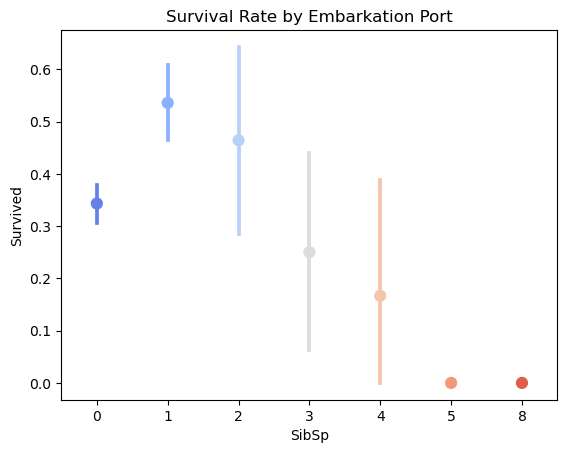

In [70]:
sb.pointplot(x='SibSp', y='Survived', data=td, palette='coolwarm')
plt.title('Survival Rate by Embarkation Port')
plt.show()


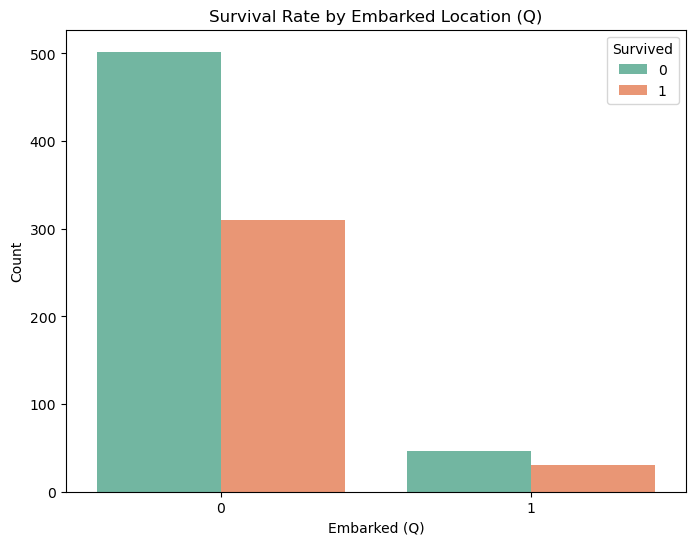

In [74]:
plt.figure(figsize=(8, 6))
sb.countplot(x='Q', hue='Survived', data=td, palette='Set2')
plt.title('Survival Rate by Embarked Location (Q)')
plt.xlabel('Embarked (Q)')
plt.ylabel('Count')
plt.show()

The count plot visualizes the survival rate of passengers based on their embarkation location, specifically for those who embarked at location "Q" (likely Queenstown in the Titanic dataset). The plot shows two bars for each category: one for passengers who survived and one for those who did not. The height of each bar represents the count of passengers in each group. By comparing the bars for "Survived" and "Did Not Survive," we can observe the survival rate of passengers who boarded at "Q." If the "Survived" bar is taller, it suggests that a higher proportion of passengers from "Q" survived, while a taller "Did Not Survive" bar would indicate the opposite. This plot provides a clear visual comparison of survival rates based on the embarkation point, shedding light on potential trends or patterns in survival.

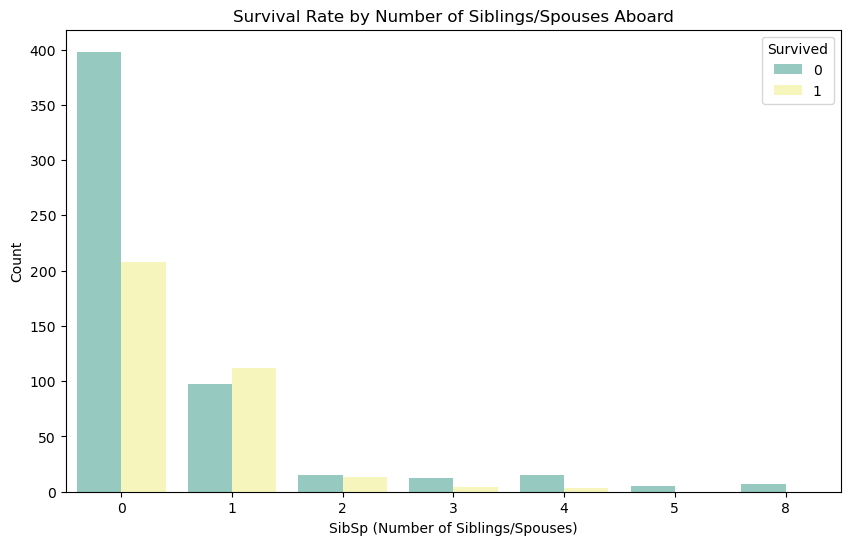

In [76]:
plt.figure(figsize=(10, 6))
sb.countplot(x='SibSp', hue='Survived', data=td, palette='Set3')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('SibSp (Number of Siblings/Spouses)')
plt.ylabel('Count')
plt.show()

The count plot shows the distribution of survival rates based on the number of siblings or spouses (SibSp) aboard the Titanic. The x-axis represents the number of siblings or spouses a passenger had, while the y-axis shows the count of passengers in each group. The plot is divided by survival status, with different colors representing passengers who survived and those who did not. By comparing the bars for each SibSp value, we can observe the survival rate within each group

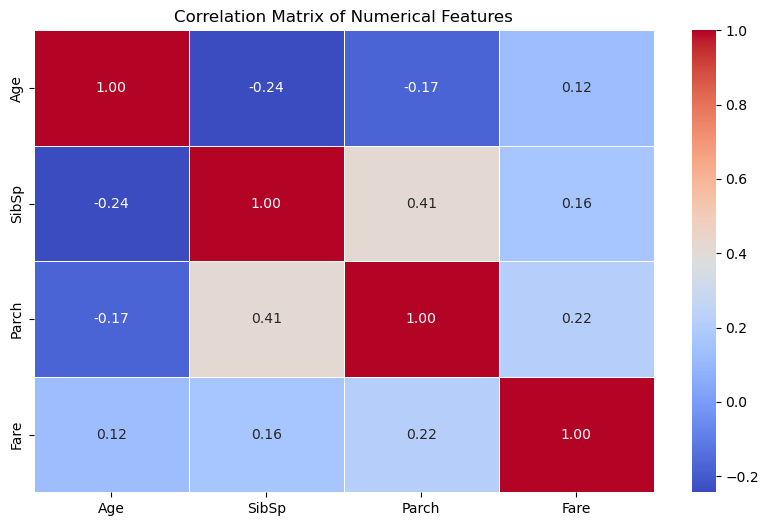

In [77]:
plt.figure(figsize=(10, 6))
correlation_matrix = td[['Age', 'SibSp', 'Parch', 'Fare']].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The heatmap provides a visual representation of the correlation between these numerical variables. Each cell in the matrix shows the correlation coefficient between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). The color intensity indicates the strength of the correlation, with red indicating positive correlations and blue indicating negative correlations.

conclusion:
    
    
In conclusion, the Titanic dataset provides valuable insights into the factors influencing passenger survival rates. Analyzing attributes such as class, age, gender, and fare paid can reveal significant patterns in survival outcomes. This dataset serves as a useful resource for training machine learning models and understanding historical trends in passenger data. It offers a clear foundation for predictive modeling and data-driven decision-making.